In [12]:
#import requests
import pandas as pd
import matplotlib.pyplot as plt 
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from tradinggym import CryptoEnvironment

In [13]:
data = pd.read_pickle('./Dataset/measurement.pickle')

In [14]:
# Create the CryptoEnvironment
environment = CryptoEnvironment(observations=data, initial_value = 10000, 
                                window_size=5, order_fraction=0.66, trade_fee=0.003375)

In [15]:
# Wrap the training environment in a vectorized form
environment = DummyVecEnv([lambda: environment])

In [16]:
# Create a model
model = PPO('MlpPolicy',env=environment)

In [17]:
# Train the model
model.learn(1000)

In [18]:
# Create an evaluation environment
testenv = CryptoEnvironment(observations=data, initial_value = 10000, 
                            window_size=5, order_fraction=0.66, trade_fee=0.003375)

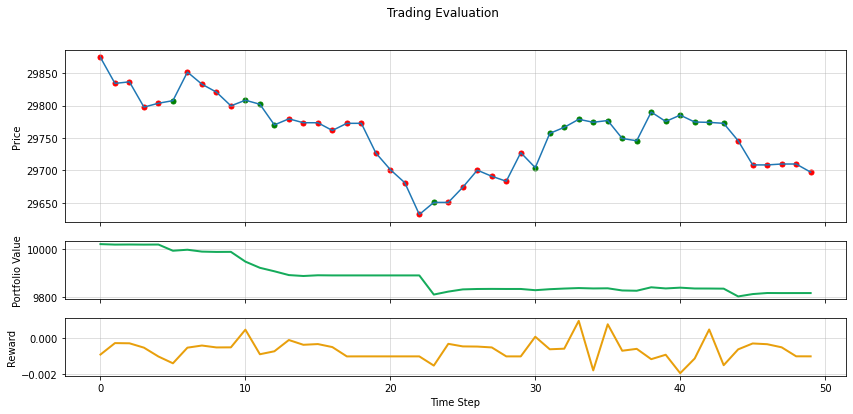

Evaluation Metrics:  
Initial value:       10022.35
Initial balance:     2464.85
Initial shares:      0.25
Initial split:       0.24
Final value:         9815.68
Profit:              -206.67
Return Rate:         -2.06%
Avg reward:          -0.00
Max reward:          0.00
Min reward:          -0.00
Cumulative reward:   -0.03


In [19]:
# Evaluate the model
testenv.evaluate(frame_length=50, render=True, model=model, marker_size=25, verbose=1)